[Inhaltsverzeichnis](../AP4.ipynb) | [ < zurück ](wohin?)|  [ > next](wohin?)

## 4.1.2 CO2-Emissionen

In [1]:
# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

In [2]:
# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

In [3]:
%matplotlib inline
from FLUCCOplus.notebooks import *
import FLUCCOplus.electricitymap as elmap

FLUCCOplus.config  loaded!
FLUCCOplus.notebooks loaded!


In [4]:
data = elmap.preprocess()
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43809 entries, 2015-01-01 00:00:00+00:00 to 2019-12-31 23:00:00+00:00
Data columns (total 17 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   carbon_intensity_avg                     43663 non-null  float64
 1   power_consumption_battery_discharge_avg  26304 non-null  float64
 2   power_consumption_biomass_avg            43663 non-null  float64
 3   power_consumption_coal_avg               43663 non-null  float64
 4   power_consumption_gas_avg                43663 non-null  float64
 5   power_consumption_geothermal_avg         43663 non-null  float64
 6   power_consumption_hydro_avg              43663 non-null  float64
 7   power_consumption_hydro_discharge_avg    43663 non-null  float64
 8   power_consumption_nuclear_avg            43663 non-null  float64
 9   power_consumption_oil_avg                43663 non-null  float64
 10 

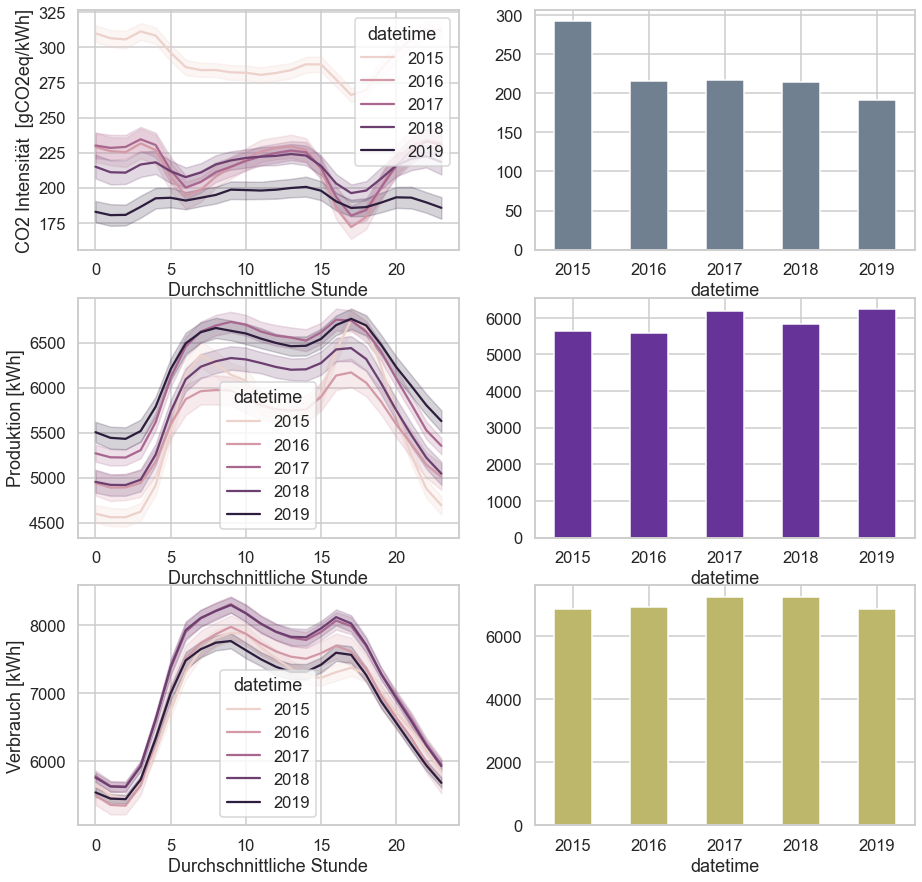

In [5]:


numerical = ["carbon_intensity_avg",
          "total_production_avg",
          "total_consumption_avg"]
titles = ["CO2 Intensität  [gCO2eq/kWh]", "Produktion [kWh]", "Verbrauch [kWh]"]
colors = ["slategrey", "rebeccapurple", "darkkhaki"]
data = data[numerical]


sns.set(style="whitegrid", palette=sns.cubehelix_palette(8), context="talk")

fig, ax = plt.subplots(3,2, figsize=(15,15))
for col, var in enumerate(numerical):
    sns.lineplot(x=data.index.hour, y=var, data=data, hue=data.index.year, ax=ax[col][0]);
    data.groupby(data.index.year)[var].mean().plot(kind="bar", rot=0, color=colors[col], ax=ax[col][1])
    ax[col][0].set(xlabel="Durchschnittliche Stunde",ylabel=titles[col])


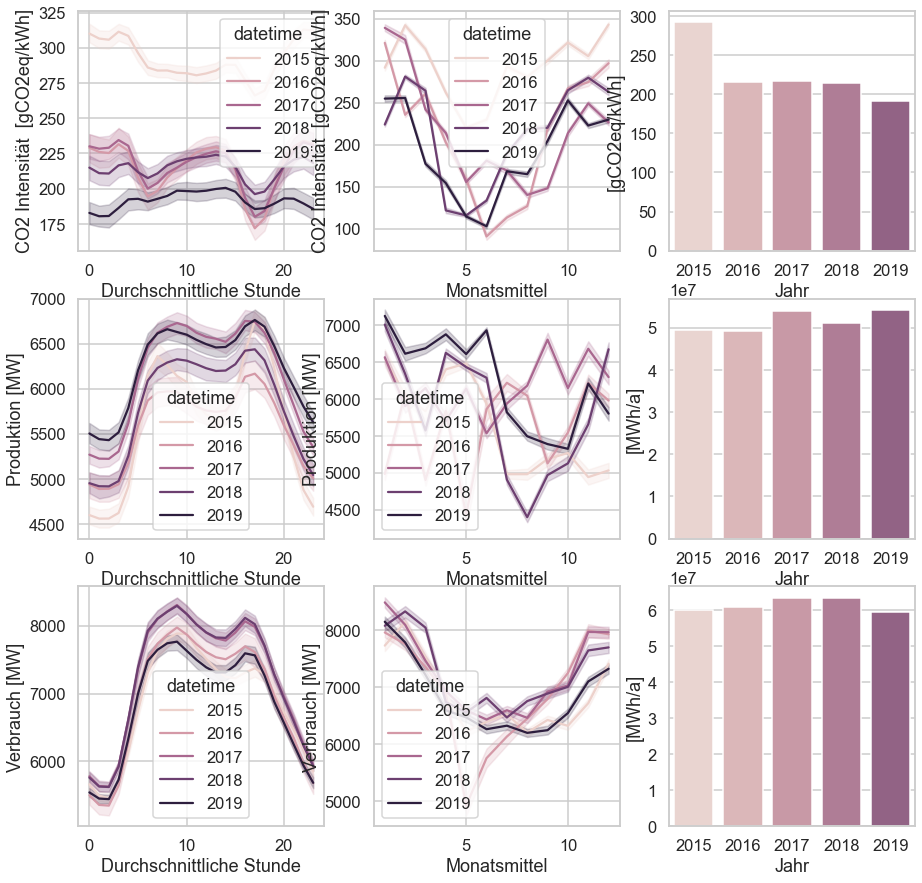

In [6]:
import FLUCCOplus.plots as fp


variables = [
        fp.Variable(name="carbon_intensity_avg",
                 ylabel="CO2 Intensität  [gCO2eq/kWh]",
                 agg="mean",ylabel_agg="[gCO2eq/kWh]"),
        fp.Variable(name="total_production_avg",
                 ylabel="Produktion [MW]",
                 agg="sum", ylabel_agg="[MWh/a]"),
        fp.Variable(name="total_consumption_avg",
                 ylabel="Verbrauch [MW]",
                 agg="sum", ylabel_agg="[MWh/a]")
]

sns.set(style="whitegrid", palette=sns.cubehelix_palette(8), context="talk")
fp.average(data, variables)

In [11]:
[
    fp.Variable(name=elmap.col("power_consumption",source),
                 ylabel=source,
                 agg="sum", ylabel_agg="[MWh/a]")
    for source in elmap.SOURCES]

[Variable(name='power_consumption_biomass_avg', ylabel='biomass', agg='sum', ylabel_agg='[MWh/a]'),
 Variable(name='power_consumption_hydro_avg', ylabel='hydro', agg='sum', ylabel_agg='[MWh/a]'),
 Variable(name='power_consumption_solar_avg', ylabel='solar', agg='sum', ylabel_agg='[MWh/a]'),
 Variable(name='power_consumption_wind_avg', ylabel='wind', agg='sum', ylabel_agg='[MWh/a]'),
 Variable(name='power_consumption_geothermal_avg', ylabel='geothermal', agg='sum', ylabel_agg='[MWh/a]'),
 Variable(name='power_consumption_coal_avg', ylabel='coal', agg='sum', ylabel_agg='[MWh/a]'),
 Variable(name='power_consumption_gas_avg', ylabel='gas', agg='sum', ylabel_agg='[MWh/a]'),
 Variable(name='power_consumption_nuclear_avg', ylabel='nuclear', agg='sum', ylabel_agg='[MWh/a]'),
 Variable(name='power_consumption_oil_avg', ylabel='oil', agg='sum', ylabel_agg='[MWh/a]'),
 Variable(name='power_consumption_unknown_avg', ylabel='unknown', agg='sum', ylabel_agg='[MWh/a]'),
 Variable(name='power_consumpt

In [12]:
variables = [
    fp.Variable(name=elmap.col("power_consumption",source),
                 ylabel=source,
                 agg="sum", ylabel_agg="[MWh/a]")
    for source in elmap.SOURCES]


fp.average_sources(data, variables)

AttributeError: 'list' object has no attribute 'name'

In [ ]:
data.agg("mean")
